We now need to create the final white light curve, taking into account the wavelength ranges we considered in #5, the resampling and the wavelength solution. We also need to standardize the ancillary data.

In [60]:
%matplotlib nbagg

In [61]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import reduction_utils.wavelength_calibration as wc

Define the contact points and wavelength range as used in notebook 5:

In [2]:
contact1 = 17
contact4 = 36

min_wvl = 3500
max_wvl = 7300

Load in the data:

In [3]:
parent_direc = '/Users/u2257755/Library/CloudStorage/OneDrive-UniversityofWarwick/LRG_BEASTS/WASP-168/2023-02-19/reduction_3/'
parent_direc = '/Users/u2257755/Library/CloudStorage/OneDrive-UniversityofWarwick/LRG_BEASTS/WASP-168/2023-02-19/reduction_3_wide/'


star1_flux = pickle.load(open(parent_direc+'pickled_objects/improved_resampling/star1_flux_resampled.pickle','rb'))
star2_flux = pickle.load(open(parent_direc+'pickled_objects/improved_resampling/star2_flux_resampled.pickle','rb'))

error1 = pickle.load(open(parent_direc+'pickled_objects/improved_resampling/star1_error_resampled.pickle','rb'))
error2 = pickle.load(open(parent_direc+'pickled_objects/improved_resampling/star2_error_resampled.pickle','rb'))

wvl_solution_1 = pickle.load(open(parent_direc+'pickled_objects/improved_resampling/wavelength_solution.pickle','rb'))

mjd = pickle.load(open(parent_direc+'pickled_objects/mjd_time.pickle','rb'))
#bad_frames = [2,3,34,82,96]  
#good_frames = np.setdiff1d(np.arange(mjd.shape[0]), bad_frames)
#mjd = mjd[good_frames]

am = pickle.load(open(parent_direc+'pickled_objects/airmass.pickle','rb'))
#am = am[good_frames]

exp_times = pickle.load(open(parent_direc+'pickled_objects/exposure_times.pickle','rb'))
#exp_times = exp_times[good_frames]

xpos1 = pickle.load(open(parent_direc+'pickled_objects/improved_resampling/xpos1_resampled.pickle','rb'))
sky1 = pickle.load(open(parent_direc+'pickled_objects/improved_resampling/sky1_resampled.pickle','rb'))
fwhm1 = pickle.load(open(parent_direc+'pickled_objects/fwhm_1.pickle','rb'))
#fwhm1 = fwhm1[good_frames]

xpos2 = pickle.load(open(parent_direc+'pickled_objects/improved_resampling/xpos2_resampled.pickle','rb'))
sky2 = pickle.load(open(parent_direc+'pickled_objects/improved_resampling/sky2_resampled.pickle','rb'))
fwhm2 = pickle.load(open(parent_direc+'pickled_objects/fwhm_2.pickle','rb'))
#fwhm2 = fwhm2[good_frames]

print(len(sky1))
print(len(fwhm1))
print(len(mjd))
print(np.size(sky1))
print(sky1.shape)

61
61
61
58621
(61, 961)


Load in y shifts, as calculated from 3_spectra_resampling.ipynb

In [4]:
ypos1 = pickle.load(open(parent_direc+'pickled_objects/ypos1.pickle','rb'))
ypos1_smooth = pickle.load(open(parent_direc+'pickled_objects/ypos1_smooth.pickle','rb'))

ypos2 = pickle.load(open(parent_direc+'pickled_objects/ypos2.pickle','rb'))
ypos2_smooth = pickle.load(open(parent_direc+'pickled_objects/ypos2_smooth.pickle','rb'))


Define time as fractional days:

In [5]:
time = mjd - int(mjd[0])

Rescale sky for differing exposure times:

In [6]:
sky1 = np.array([i/j for i,j in zip(sky1,exp_times)])
sky2 = np.array([i/j for i,j in zip(sky2,exp_times)])

As before, remove frame 5 and cut at frame 84

In [7]:
start_idx = 0
end_idx = -1

if end_idx == -1:
    end_idx = None

star1_flux = np.vstack((star1_flux[start_idx:end_idx]))
star2_flux = np.vstack((star2_flux[start_idx:end_idx]))

error1 = np.vstack((error1[start_idx:end_idx]))
error2 = np.vstack((error2[start_idx:end_idx]))

mjd = np.hstack((mjd[start_idx:end_idx]))

time = np.hstack((time[start_idx:end_idx]))

exp_times = np.hstack((exp_times[start_idx:end_idx]))

sky1 = np.vstack((sky1[start_idx:end_idx]))
sky2 = np.vstack((sky2[start_idx:end_idx]))

xpos1 = np.vstack((xpos1[start_idx:end_idx]))
xpos2 = np.vstack((xpos2[start_idx:end_idx]))

fwhm1 = np.hstack((fwhm1[start_idx:end_idx]))
fwhm2 = np.hstack((fwhm2[start_idx:end_idx]))

ypos1 = np.hstack((ypos1[start_idx:end_idx]))
ypos2 = np.hstack((ypos2[start_idx:end_idx]))

ypos1_smooth = np.hstack((ypos1_smooth[start_idx:end_idx]))
ypos2_smooth = np.hstack((ypos2_smooth[start_idx:end_idx]))

am = np.hstack((am[start_idx:end_idx]))

nframes = len(star1_flux)

print('star1_flux:',np.shape(star1_flux),'error1: ',np.shape(error1),'mjd: ',np.shape(mjd),'time: ',np.shape(time),'exp_times: ',np.shape(exp_times),'sky1: ',np.shape(sky1),'xpos1: ',np.shape(xpos1),'fwhm1: ',np.shape(fwhm1),'ypos1: ',np.shape(ypos1),'am: ',np.shape(am))

star1_flux: (61, 961) error1:  (61, 961) mjd:  (61,) time:  (61,) exp_times:  (61,) sky1:  (61, 961) xpos1:  (61, 961) fwhm1:  (61,) ypos1:  (61,) am:  (61,)


Now cut only consider the wavelength range used for the spectroscopic light curves:

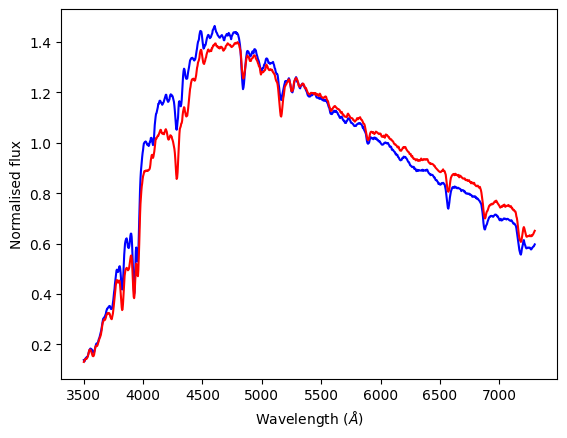

In [8]:
blue_mask = wvl_solution_1 < min_wvl
red_mask = wvl_solution_1 > max_wvl
combined_mask = blue_mask + red_mask

# Invert the mask
combined_mask = ~combined_mask


plt.figure()
plt.plot(wvl_solution_1[combined_mask],wc.normalise(star1_flux[nframes//2][combined_mask]),'b')
plt.plot(wvl_solution_1[combined_mask],wc.normalise(star2_flux[nframes//2][combined_mask]),'r')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Normalised flux')
plt.show()

And perform the cut:

In [9]:
s1 = star1_flux[:,combined_mask]
s2 = star2_flux[:,combined_mask]

e1 = error1[:,combined_mask]
e2 = error2[:,combined_mask]

sky1 = sky1[:,combined_mask]
xpos1 = xpos1[:,combined_mask]

sky2 = sky2[:,combined_mask]
xpos2 = xpos2[:,combined_mask]

wvl = wvl_solution_1[combined_mask]

Now create the white light curve, normalise to the out of transit data and plot:

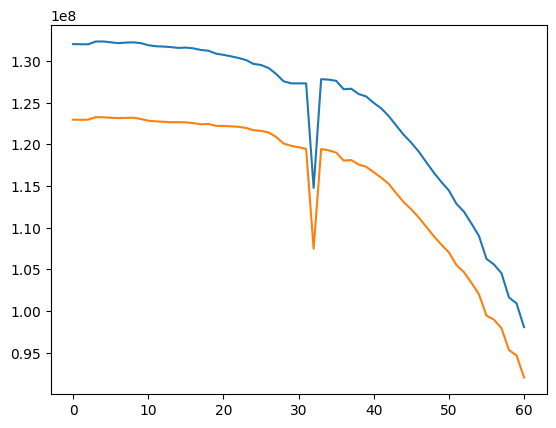

In [10]:
plt.plot(np.sum(s1,axis=1))
plt.plot(np.sum(s2,axis=1))

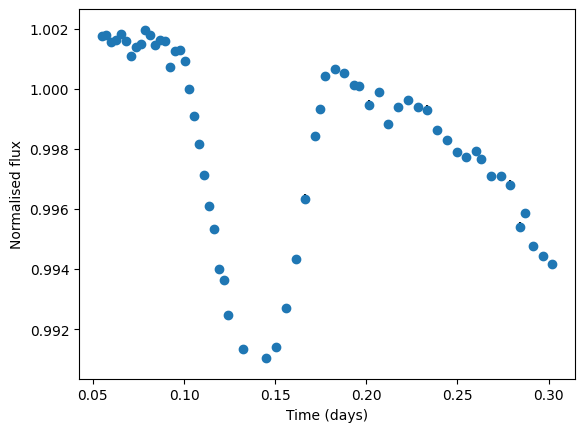

In [11]:
ratio = np.sum(s1,axis=1)/np.sum(s2,axis=1)
err_ratio = np.sqrt((np.sqrt(np.sum(e1**2,axis=1))/np.sum(s1,axis=1))**2 \
                    + (np.sqrt(np.sum(e2**2,axis=1))/np.sum(s2,axis=1))**2)*ratio


flux = ratio/np.median(ratio[:contact1].tolist()+ratio[contact4:].tolist())
error = (err_ratio/ratio) * flux

plt.figure()
plt.errorbar(time,flux,yerr=error,fmt='o',ecolor='k',capsize=0)
plt.ylabel('Normalised flux')
plt.xlabel('Time (days)')
plt.show()

And save the output:

In [12]:
pickle.dump(flux,open(parent_direc+'pickled_objects/WL/white_light_flux.pickle','wb'))
pickle.dump(error,open(parent_direc+'pickled_objects/WL/white_light_error.pickle','wb'))

Now combine and standardize the ancillary data for use in the fitting process.  This is done via subtracting the mean and dividing by the standard deviation.

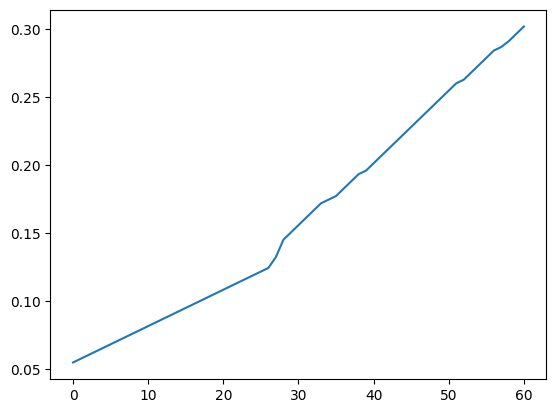

In [13]:
plt.plot(time)

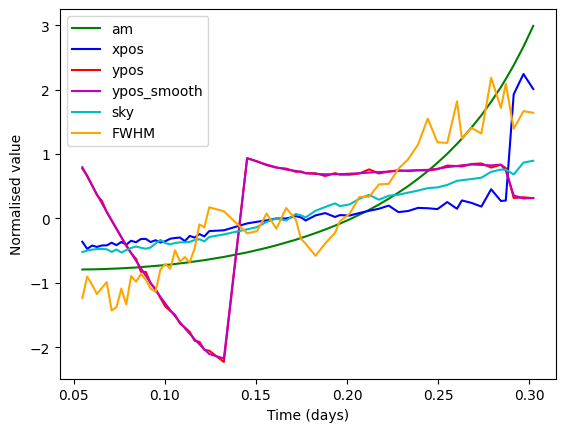

In [14]:

xpos1_norm = (xpos1.mean(axis=1)-xpos1.mean())/xpos1.std()
xpos2_norm = (xpos2.mean(axis=1)-xpos2.mean())/xpos2.std()

xpos = np.mean((xpos1_norm,xpos2_norm),axis=0)

ypos1_norm = (ypos1-ypos1.mean())/ypos1.std()
ypos2_norm = (ypos2-ypos2.mean())/ypos2.std()

# combine ypos into a single array from star 1 and star 2
ypos = np.mean((ypos1_norm,ypos2_norm),axis=0)


ypos1_smooth_norm = (ypos1_smooth-ypos1_smooth.mean())/ypos1_smooth.std()
ypos2_smooth_norm = (ypos2_smooth-ypos2_smooth.mean())/ypos2_smooth.std()

# combine ypos_smooth into a single array from star 1 and star 2
ypos_smooth  = np.mean((ypos1_smooth_norm,ypos2_smooth_norm),axis=0)

sky1_norm = (sky1.mean(axis=1)-sky1.mean())/sky1.std()
sky2_norm = (sky2.mean(axis=1)-sky2.mean())/sky2.std()

sky = np.mean((sky1_norm,sky2_norm),axis=0)

fwhm1_norm = (fwhm1-fwhm1.mean())/fwhm1.std()
fwhm2_norm = (fwhm2-fwhm2.mean())/fwhm2.std()

fwhm = np.mean((fwhm1_norm,fwhm2_norm),axis=0)

am_norm = (am-am.mean())/am.std()

plt.figure()
plt.plot(time,am_norm,'g',label='am')
plt.plot(time,xpos,'b',label='xpos')
plt.plot(time,ypos,'r',label='ypos')
plt.plot(time,ypos_smooth,'m',label='ypos_smooth')
plt.plot(time,sky,'c',label='sky')
plt.plot(time,fwhm,'orange',label='FWHM')
plt.xlabel('Time (days)')
plt.ylabel('Normalised value')
plt.legend(loc='upper left')
plt.show()

#fwhm_norm.pickle,xpos_norm.pickle,ypos_norm.pickle,am_norm.pickle,sky_norm.pickle

And save the output:

In [15]:
am_norm

array([-0.7929353 , -0.79085884, -0.79085884, -0.78878238, -0.78670592,
       -0.78462946, -0.78047654, -0.77840008, -0.77424716, -0.77009424,
       -0.76594132, -0.7617884 , -0.75555903, -0.74932965, -0.74310027,
       -0.73687089, -0.73064151, -0.72233567, -0.71610629, -0.70780045,
       -0.69741815, -0.68911231, -0.67873001, -0.66834772, -0.65796542,
       -0.64758312, -0.63512436, -0.59774808, -0.52714845, -0.49184864,
       -0.45654882, -0.41709609, -0.37349043, -0.32988478, -0.30496726,
       -0.28004974, -0.22813825, -0.17207384, -0.1118565 , -0.08070961,
       -0.0142629 ,  0.0584132 ,  0.13316575,  0.21622414,  0.30551191,
        0.40102905,  0.50277558,  0.61490441,  0.73326261,  0.86407958,
        1.00320238,  1.1568604 ,  1.23784233,  1.41226495,  1.60122279,
        1.81094522,  2.03935579,  2.16394338,  2.37781873,  2.66644664,
        2.9882979 ])

In [16]:
pickle.dump(am_norm,open(parent_direc+'pickled_objects/WL/am_norm.pickle','wb'))

pickle.dump(fwhm,open(parent_direc+'pickled_objects/WL/fwhm_norm.pickle','wb'))

pickle.dump(sky,open(parent_direc+'pickled_objects/WL/sky_norm.pickle','wb'))

pickle.dump(xpos,open(parent_direc+'pickled_objects/WL/xpos_norm.pickle','wb'))

pickle.dump(ypos,open(parent_direc+'pickled_objects/WL/ypos_norm.pickle','wb'))

pickle.dump(ypos_smooth,open(parent_direc+'pickled_objects/WL/ypos_smooth_norm.pickle','wb'))

pickle.dump(time,open(parent_direc+'pickled_objects/WL/time_norm.pickle','wb'))

We also want to calculate the central wavelength and wavelength range used for the white light curve to calculate the limb darkening coefficients.

In [17]:
wvl_centre = np.array([(max_wvl+min_wvl)//2])
wvl_error = np.array([max_wvl-min_wvl])

print(wvl_centre,wvl_error)


[5400] [3800]


And save:

In [18]:
pickle.dump(wvl_centre,open(parent_direc+'pickled_objects/WL/white_wvl_centre.pickle','wb'))
pickle.dump(wvl_error,open(parent_direc+'pickled_objects/WL/white_wvl_error.pickle','wb'))

Now we have spectroscopic and white light curves, we can fit the data!

In [80]:
pwd

'/Users/u2257755/Documents/Tiberius/Tiberius/src/reduction_utils/EFOSC_utils/example_notebooks (WASP168 night 3)'

1.049 1.049 2.87


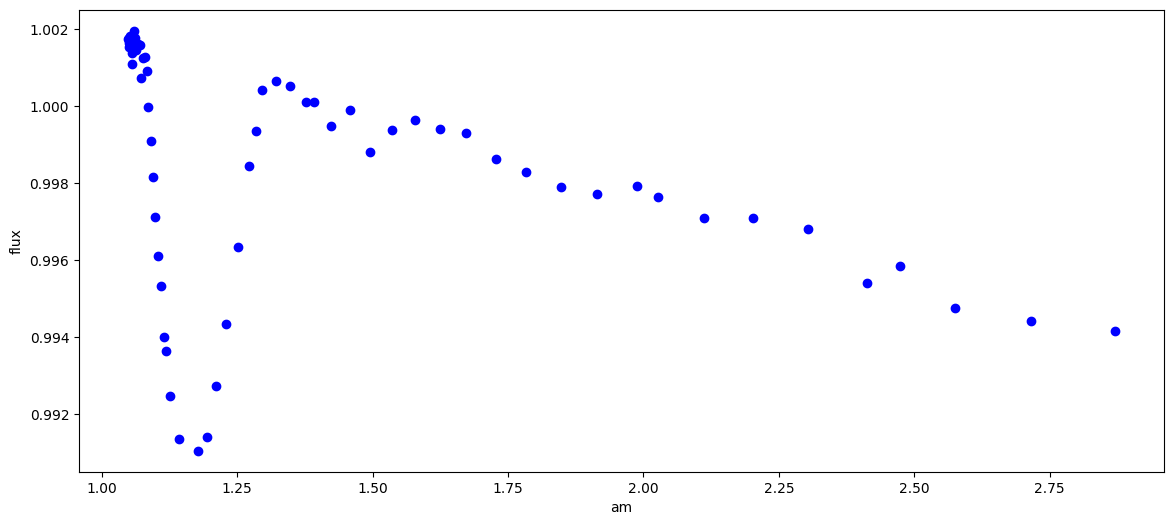

In [19]:
print(am[0],min(am),am[-1])

plt.figure(figsize=(14,6))
plt.plot(am,flux,'bo')
plt.ylabel('flux')
plt.xlabel('am')
plt.show()

0.0006946317504458676 -0.0038785218173698075 -0.0022459254433713186


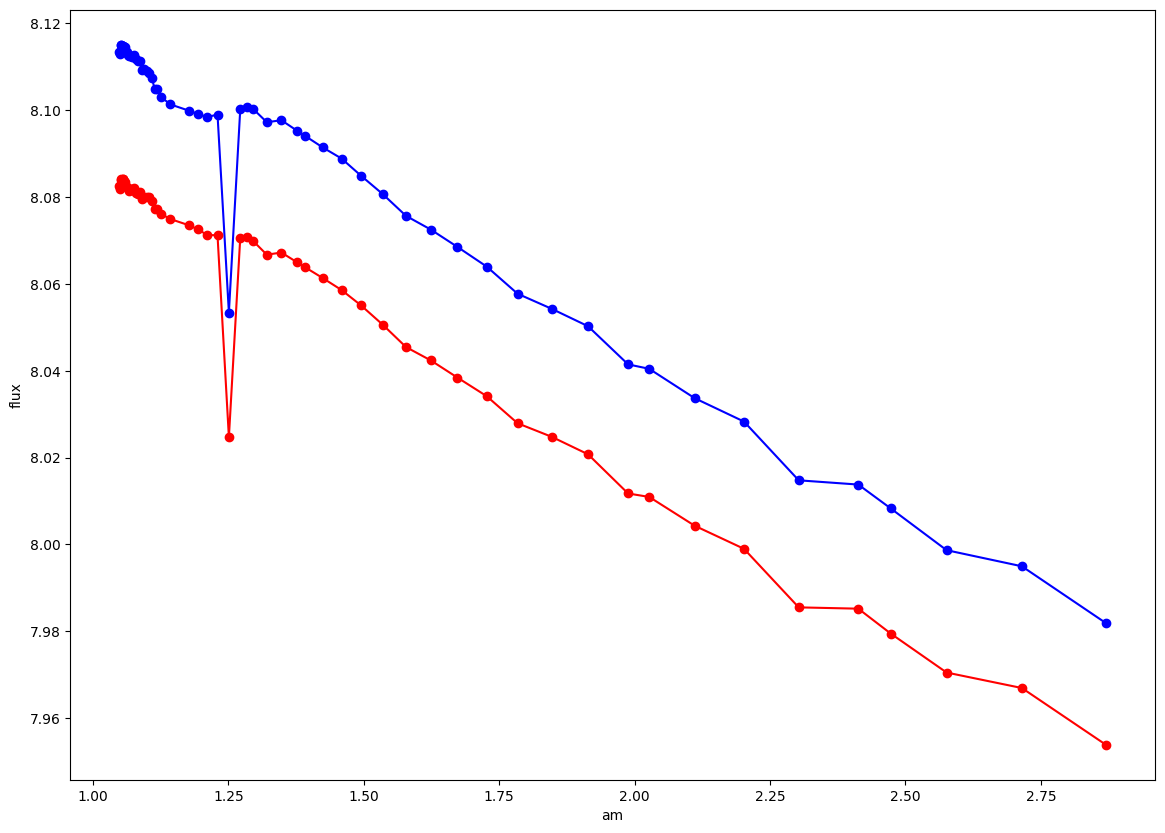

In [35]:
extinction = np.exp(-am)
extinction = np.log10(flux)
print(extinction[0],min(extinction),extinction[-1])

plt.figure(figsize=(14,10))
plt.plot(am,np.log10(np.sum(s1,axis=1)),'b-o')
plt.plot(am,np.log10(np.sum(s2,axis=1)),'r-o')
plt.ylabel('flux')
plt.xlabel('am')
plt.show()


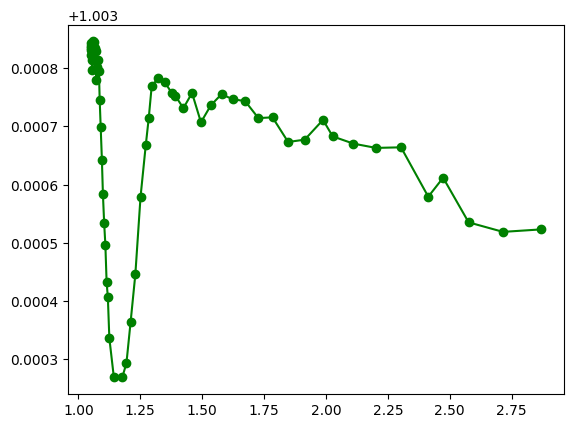

In [36]:
plt.plot(am,np.log10(np.sum(s1,axis=1))/np.log10(np.sum(s2,axis=1)),'g-o')

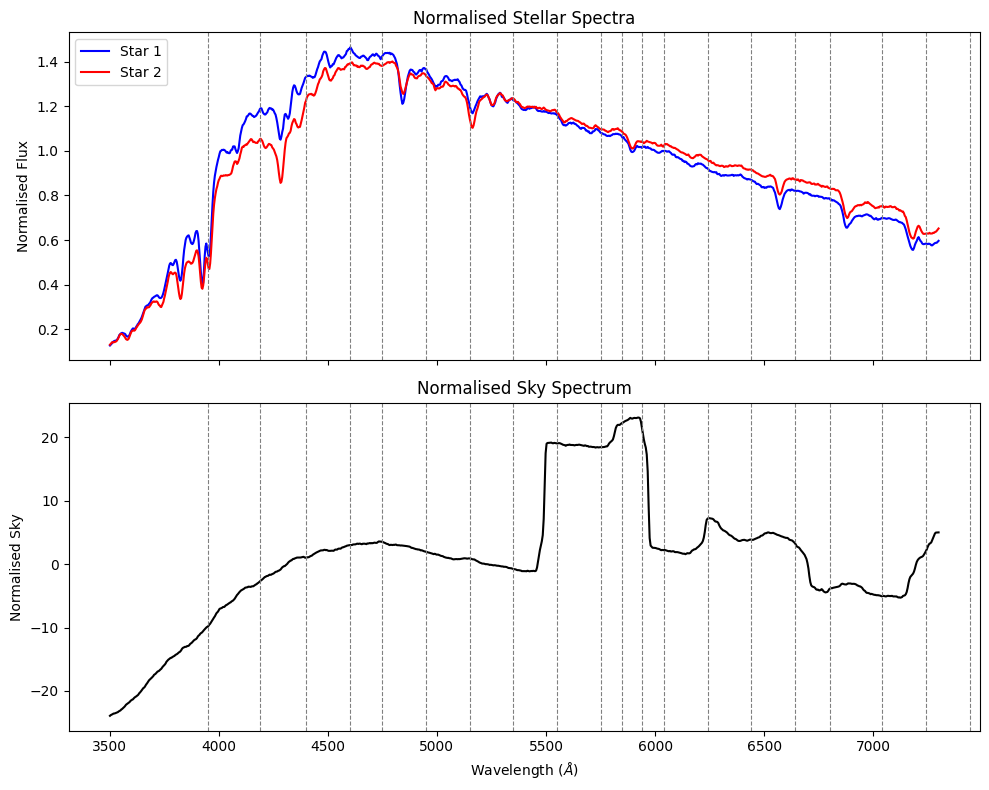

In [37]:
import matplotlib.pyplot as plt

# Prepare sky_other
sky1_norm_other = (sky1.mean(axis=0) - sky1.mean()) / sky1.std()
sky2_norm_other = (sky2.mean(axis=0) - sky2.mean()) / sky2.std()
sky_other = np.mean((sky1_norm_other, sky2_norm_other), axis=0)

# Define bin edges
bin_edges = [3950, 4190, 4400, 4600, 4750, 4950, 5150, 5350, 5550, 5750,
             5850, 5940, 6040, 6240, 6440, 6640, 6800, 7040, 7240, 7440]

# Set up figure with two vertical subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# First subplot: stellar fluxes
axs[0].plot(wvl_solution_1[combined_mask], wc.normalise(star1_flux[nframes//2][combined_mask]), 'b', label='Star 1')
axs[0].plot(wvl_solution_1[combined_mask], wc.normalise(star2_flux[nframes//2][combined_mask]), 'r', label='Star 2')
axs[0].set_ylabel('Normalised Flux')
axs[0].set_title('Normalised Stellar Spectra')
axs[0].legend()

# Second subplot: sky
axs[1].plot(wvl_solution_1[combined_mask], wc.normalise(sky_other), 'k')
axs[1].set_xlabel('Wavelength ($\AA$)')
axs[1].set_ylabel('Normalised Sky')
axs[1].set_title('Normalised Sky Spectrum')

# Add dashed vertical bin edge lines to both subplots
for ax in axs:
    for edge in bin_edges:
        ax.axvline(edge, linestyle='--', color='gray', linewidth=0.8)

plt.tight_layout()
plt.show()

#import reduction_utils.wavelength_binning as wb
#wb.plot_spectra(np.sum(s1,axis=1)[nframes//2],np.sum(s1,axis=1)[nframes//2],wvl_solution_1,\
#                bin_edges=bin_edges,ratio=True,save_fig=False,alkali=True,telluric=True)

In [38]:
np.size(wvl_solution_1[combined_mask])
np.size(sky_other)

932